<h1><center>Predicting Airline Satisfaction</center></h1>

## **Data Dictionary:**

### **The dataset consists of 20 numerical and 5 categorical attributes.** 

- **SR**: A sequential number
- **Id**: Id number of the passenger
- **Gender**: Gender of the passenger
- **Customer Type**: The loyalty type 
- **Age**: The actual age of the passenger
- **Type of Travel**: Purpose of the flight of the passenger
- **Class**: Travel class in the plane of the passenger
- **Flight Distance**: Flight distance of the trip
- **Inflight wifi service**: Satisfaction level of the inflight wifi service
- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient
- **Ease of Online booking**: Satisfaction level of online booking
- **Gate location**: Satisfaction level of Gate location
- **Food and drink**: Satisfaction level of Food and drink service
- **Online boarding**: Satisfaction level of online boarding
- **Seat comfort**: Satisfaction level of Seat comfort
- **Inflight entertainment**: Satisfaction level of inflight entertainment
- **On-board service**: Satisfaction level of On-board service
- **Leg room service**: Satisfaction level of Leg room service
- **Baggage handling**: Satisfaction level of baggage handling
- **Checkin service**: Satisfaction level of Check-in service
- **Inflight service**: Satisfaction level of inflight service
- **Cleanliness**: Satisfaction level of Cleanliness
- **Departure Delay in Minutes**: Minutes delayed when departure
- **Arrival Delay in Minutes**: Minutes delayed when arrival
- **Satisfaction**: Airline satisfaction level ('satisfied', 'neutral or dissatisfied')

The **Satisfaction** attribute is used as the target label. Satisfaction levels are represented as 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied



## **Business Problem:**
- Airlines want to increase customer satisfaction in hopes of increasing loyalty and sales

## **Objective**
- Objective is to build a Machine Learning model that can help in predicting whether a customer is satisfied with an airline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import sklearn
from xgboost import XGBClassifier, plot_importance
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
sns.set_palette('PRGn')

## Load Data

In [4]:
data = pd.read_csv('airline_clnd.csv', index_col = False)

## Look at the data

In [5]:
data.shape

(103904, 25)

In [6]:
data.head().T

,0,1,2,3,4
SR,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer_Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type_of_Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight_Distance,460,235,1142,562,214
Inflight_wifi_service,3,3,2,2,3
Departure/Arrival_time_convenient,4,2,2,5,3


In [7]:
# Look at the variable types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SR                                 103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

#### **Observations:**
There are 5 character variables and 20 numeric variables. <br/>
Only the Arrival_Delay_in_Minutes variables contains missing values with 310 values missing


In [8]:
# Resolve missing values by using the values from Departure_Delay_in_Minutes
data['Arrival_Delay_in_Minutes'] = data['Arrival_Delay_in_Minutes'].fillna(data['Departure_Delay_in_Minutes'])

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SR,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight_Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival_time_convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate_location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food_and_drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online_boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [10]:
# Verify any duplicates
data.duplicated().sum()

0

In [11]:
# Look at the variable values
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print()

SR
[0 1 2 3 4]
103904

id
[ 70172   5047 110028  24026 119299]
103904

Gender
['Male' 'Female']
2

Customer_Type
['Loyal Customer' 'disloyal Customer']
2

Age
[13 25 26 61 47]
75

Type_of_Travel
['Personal Travel' 'Business travel']
2

Class
['Eco Plus' 'Business' 'Eco']
3

Flight_Distance
[ 460  235 1142  562  214]
3802

Inflight_wifi_service
[3 2 4 1 5]
6

Departure/Arrival_time_convenient
[4 2 5 3 1]
6

Ease_of_Online_booking
[3 2 5 4 1]
6

Gate_location
[1 3 2 5 4]
6

Food_and_drink
[5 1 2 4 3]
6

Online_boarding
[3 5 2 1 4]
6

Seat_comfort
[5 1 2 3 4]
6

Inflight_entertainment
[5 1 2 3 4]
6

On-board_service
[4 1 2 3 5]
6

Leg_room_service
[3 5 4 2 1]
6

Baggage_handling
[4 3 5 1 2]
5

Checkin_service
[4 1 3 5 2]
6

Inflight_service
[5 4 3 1 2]
6

Cleanliness
[5 1 2 3 4]
6

Departure_Delay_in_Minutes
[25  1  0 11  9]
446

Arrival_Delay_in_Minutes
[18.  6.  0.  9. 23.]
456

satisfaction
['neutral or dissatisfied' 'satisfied']
2



#### **Observations:**
All variables with 6 unique values or less should be considered factors.<br/>
Variables SR and Id can probably be dropped. <br/>
The 'neutral or dissatisfied' category should be considered as 'unsatisfied'

In [12]:
# Drop the SR and Id
del data['SR']
del data['id']

In [13]:
# Rename 'neutral or dissatisfied' category to 'unsatisfied'
data.loc[data.satisfaction == "neutral or dissatisfied", 'satisfaction'] = "unsatisfied"

In [14]:
data.shape

(103904, 23)

## Univariate Analysis

Define the numerical, categorical and continuous variables.

In [15]:
# Capture the categorical variables
categorical = [col for col in data.columns if data[col].dtype in ['object', 'bool']]
categorical

['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction']

In [16]:
# Capture the numerical variables
numerical = [col for col in data.columns if col not in categorical]
numerical

['Age',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

In [17]:
# Remove the target variable from the list
categorical.remove('satisfaction')

In [18]:
# Capture the continuous variables
continuous = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

In [19]:
services = ['Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness']

Text(0.5, 1.0, 'Satisfaction Count')

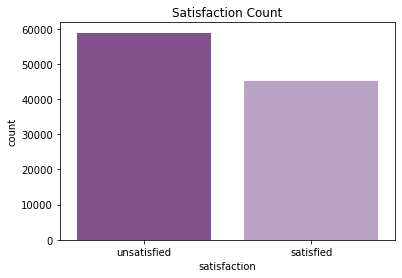

In [20]:
# Look at the count for the target variable
sns.countplot(data=data, x='satisfaction')
plt.title('Satisfaction Count')

In [21]:
# Satisfaction values are balanced
data['satisfaction'].value_counts()

unsatisfied    58879
satisfied      45025
Name: satisfaction, dtype: int64

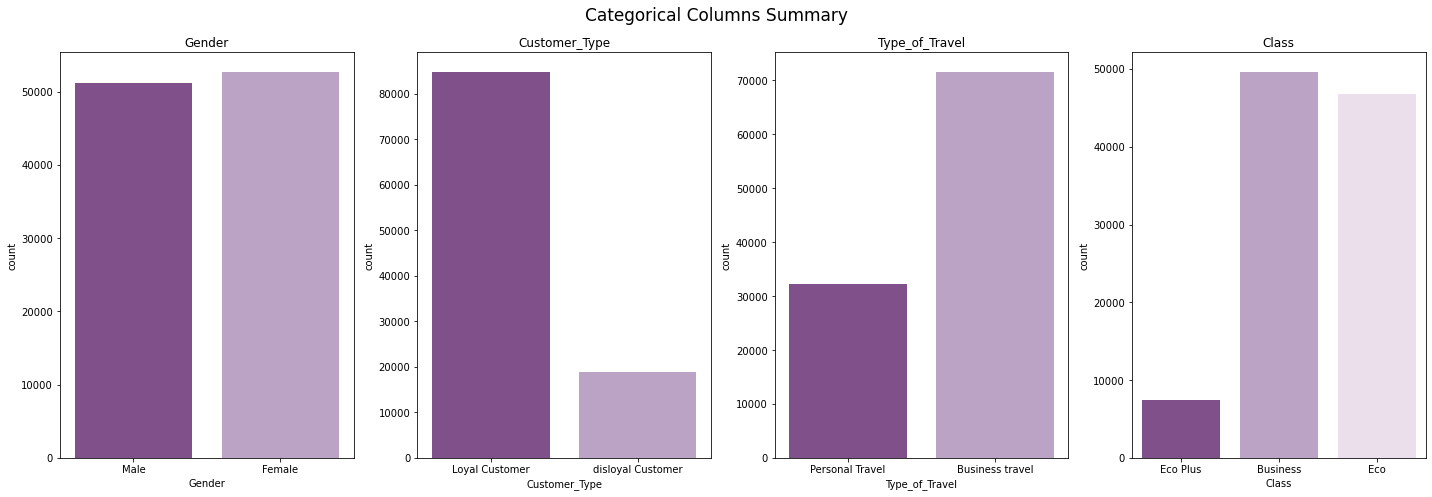

In [22]:
# Look at the counts for the categorical variables
ind = 0
fig,axes = plt.subplots(1,len(categorical),figsize=(20,7))
for ind,col in enumerate(categorical):
    sns.countplot(x=data[col], ax=axes[ind])
    axes[ind].set_title(col,size=12)
    
fig.suptitle("Categorical Columns Summary",size=17)
fig.tight_layout()
plt.show()

#### **Observations:**
Gender values are pretty even <br/>
Customer type, Type of Travel and Class values are imbalanced

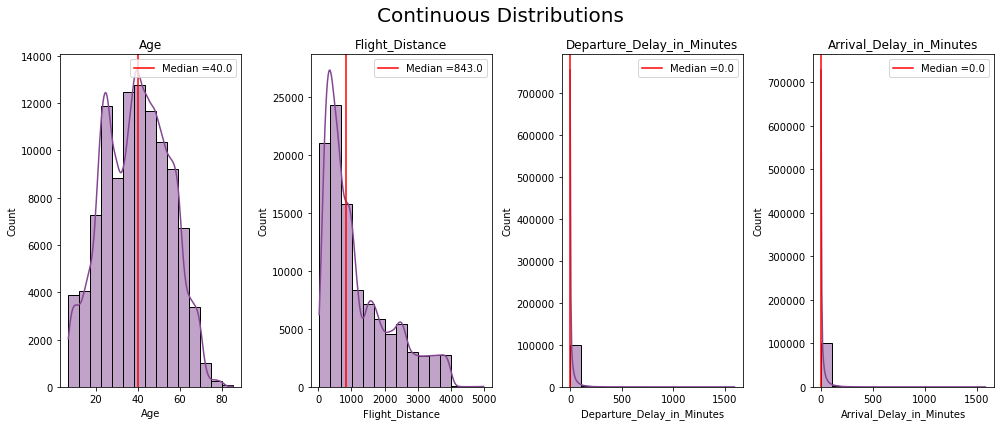

In [23]:
# Look at the continuous variables
fig,axs = plt.subplots(1,len(continuous),figsize=(14,6))

for ind,col in enumerate(continuous[:len(continuous)]):
    sns.histplot(data=data,x=col,ax=axs[ind],kde=True,bins=15)
    axs[ind].set_title(col)
    axs[ind].set_xlabel(col)
    axs[ind].axvline(data[col].median(),label=f'Median ={data[col].median()}',color='r')
    axs[ind].legend()
    
fig.suptitle("Continuous Distributions",size=20)
fig.tight_layout()
plt.show()

#### **Observations:**
Age values ares close to being normally distributed <br/>
The other continuous variable data is skewed

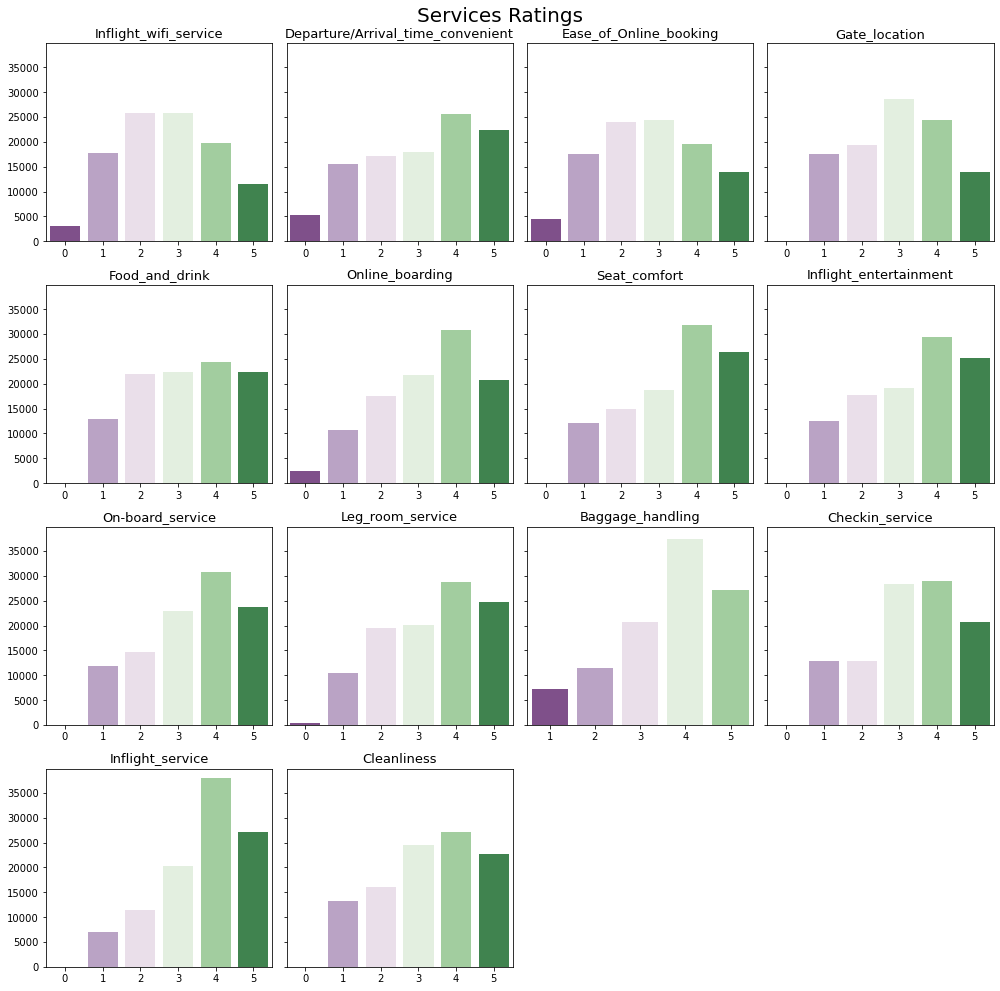

In [24]:
# Look at the factor variables
fig,axes = plt.subplots(4,4,figsize=(14,14),sharey=True)
k = 0
for i in range(4):
    for j in range(4):
        sns.countplot(data=data,x=services[k],ax=axes[i][j])
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(services[k],size=13)

        k+=1
        if k>13:break
      
    
axes[3][2].axis('off')
axes[3][3].axis('off')

fig.suptitle("Services Ratings",size=20)
fig.tight_layout()
plt.show()


#### **Observations:**
Customers are satisfied with inflight service and baggage handling. <br/>
There is some dissatisfaction with inflight wifi service

## Bivariate Analysis

In [25]:
data.corr()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012137
Flight_Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002154
Inflight_wifi_service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019038
Departure/Arrival_time_convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000645
Ease_of_Online_booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.008051
Gate_location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005082
Food_and_drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032455
Online_boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.022389
Seat_comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.030450
Inflight_entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030487


<Figure size 800x640 with 0 Axes>

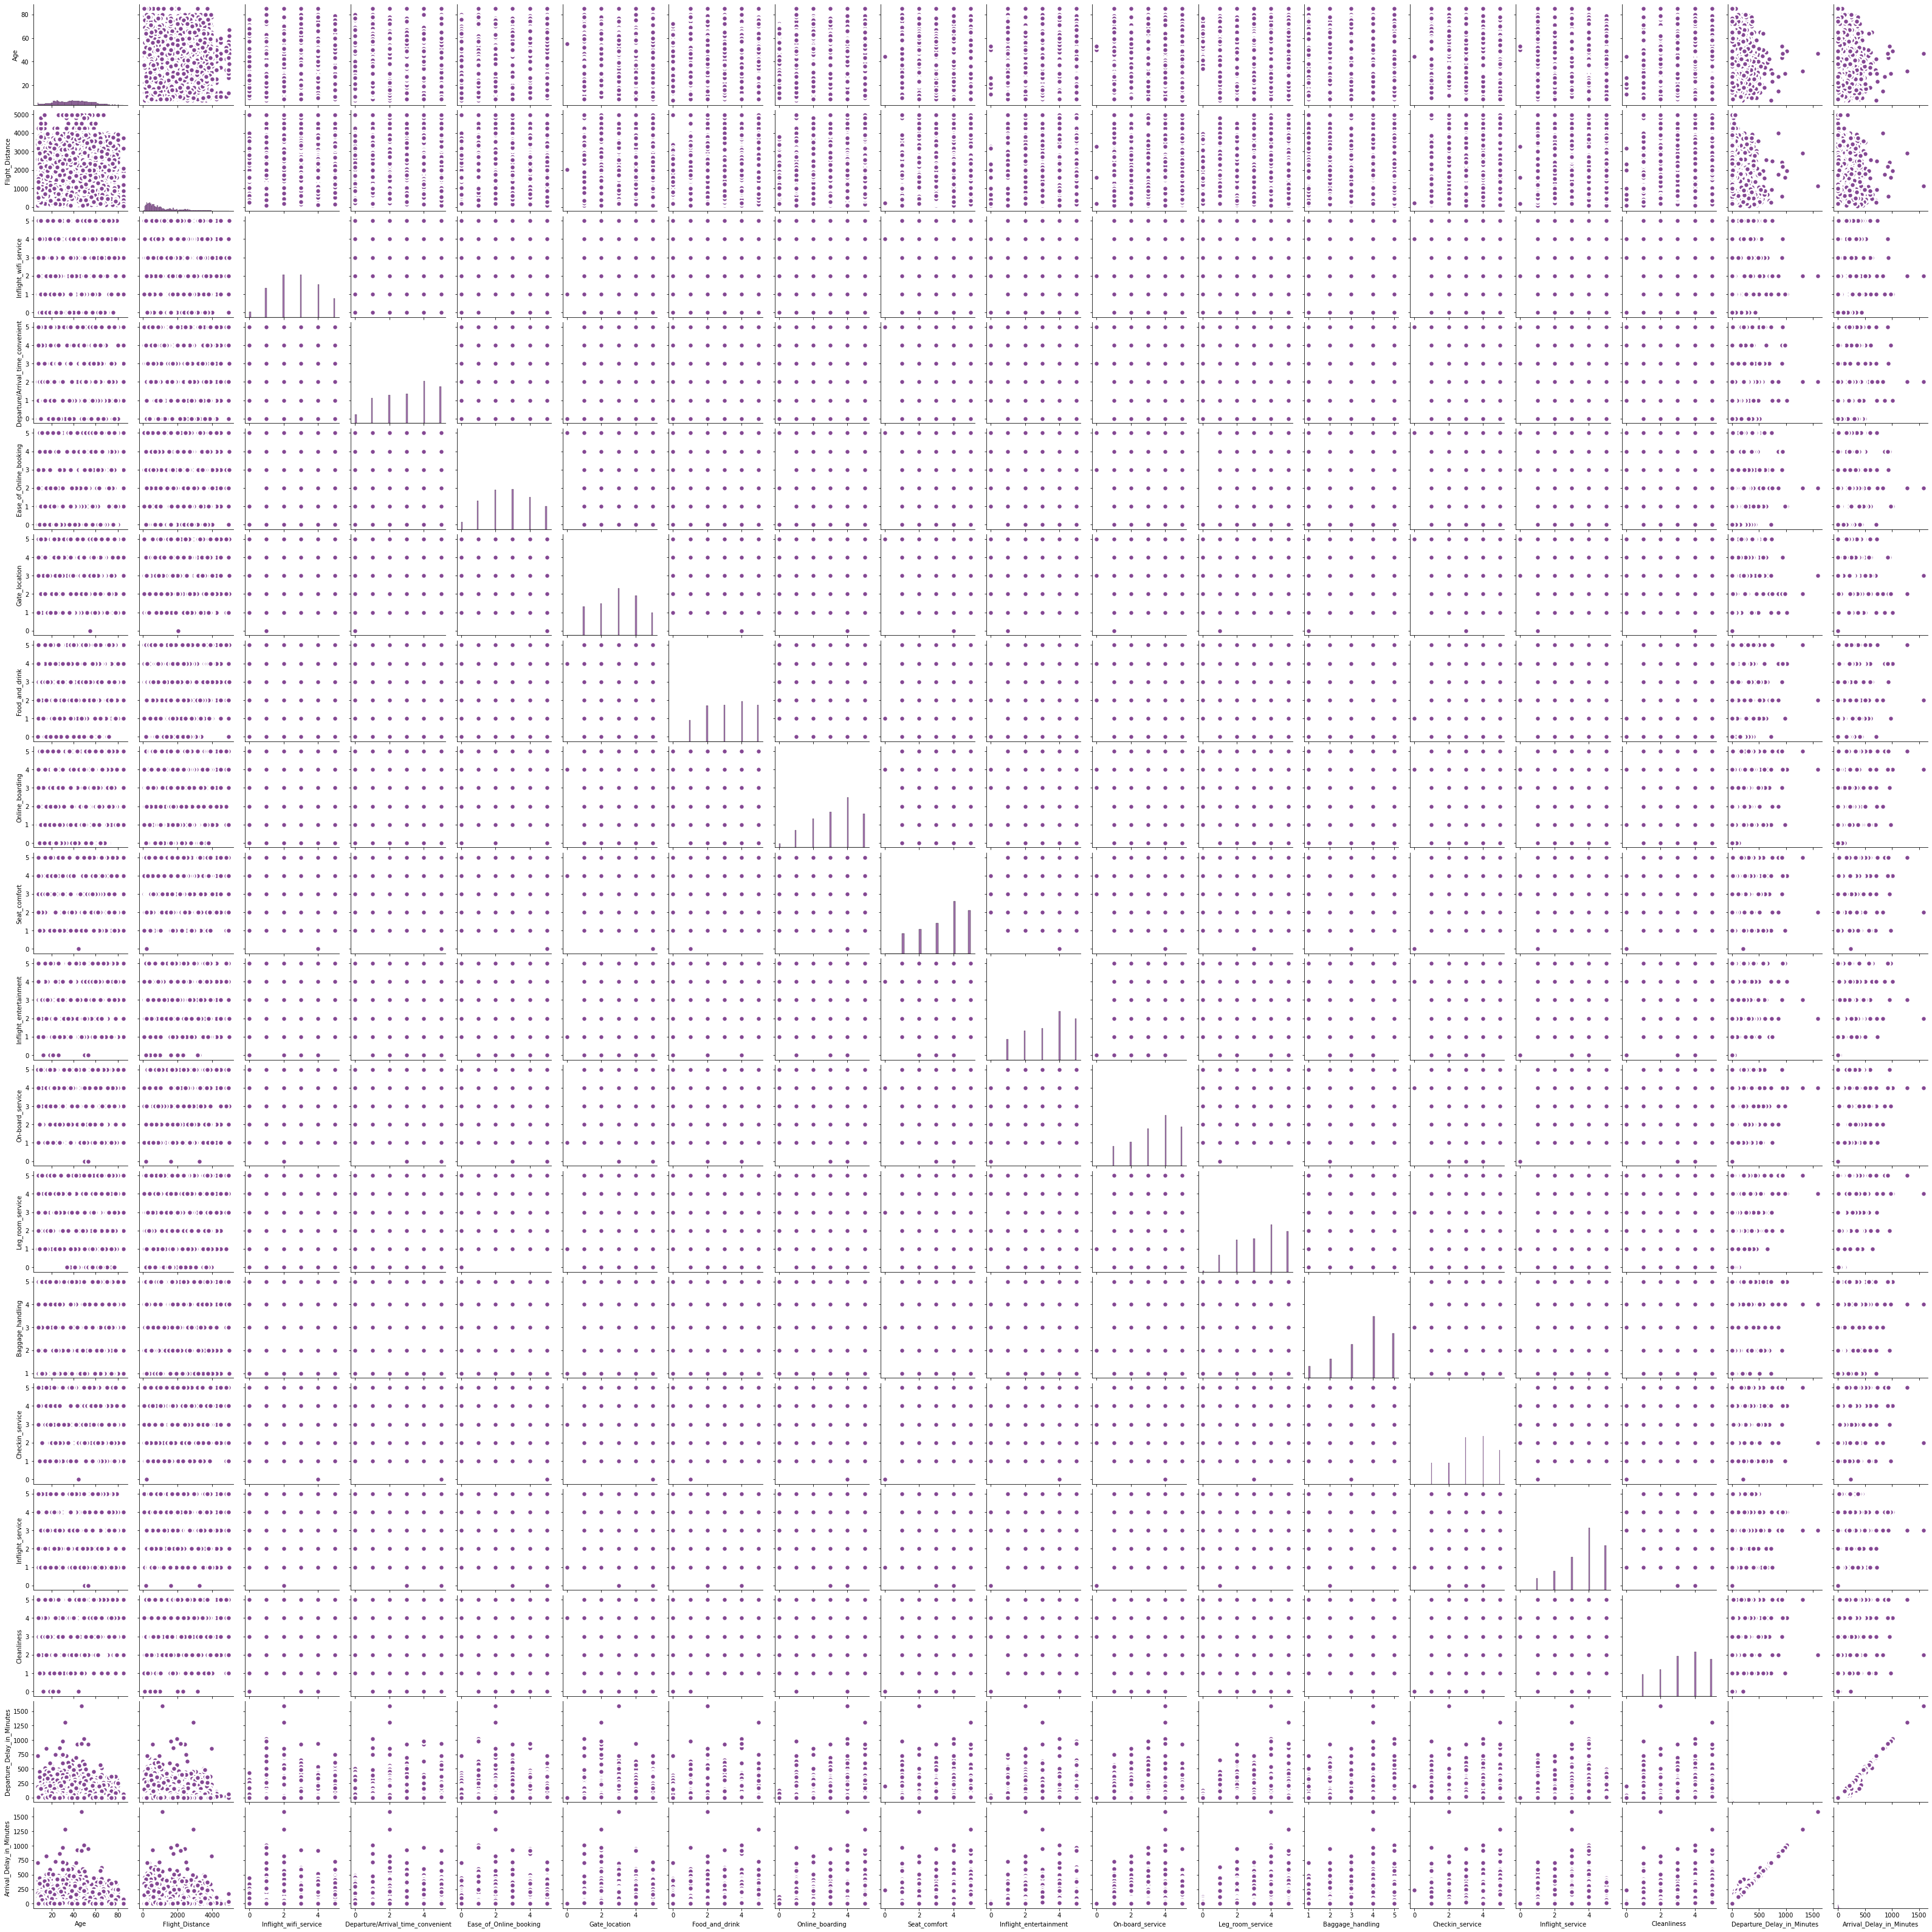

In [26]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data.loc[:, numerical], 
             kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

#### **Observations:**
There is strong correlation between the Departure_Delay_in_Minutes and Arrival_Delay_in_Minutes variables. <br/>

<AxesSubplot:xlabel='Departure_Delay_in_Minutes', ylabel='Arrival_Delay_in_Minutes'>

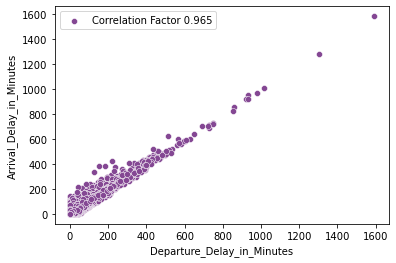

In [27]:
# Take a closer look at the delay correlation
sns.scatterplot(data=data, x="Departure_Delay_in_Minutes", y="Arrival_Delay_in_Minutes", label=f"Correlation Factor {str(data['Departure_Delay_in_Minutes'].corr(data['Arrival_Delay_in_Minutes']))[:5]}", palette='PRGn')

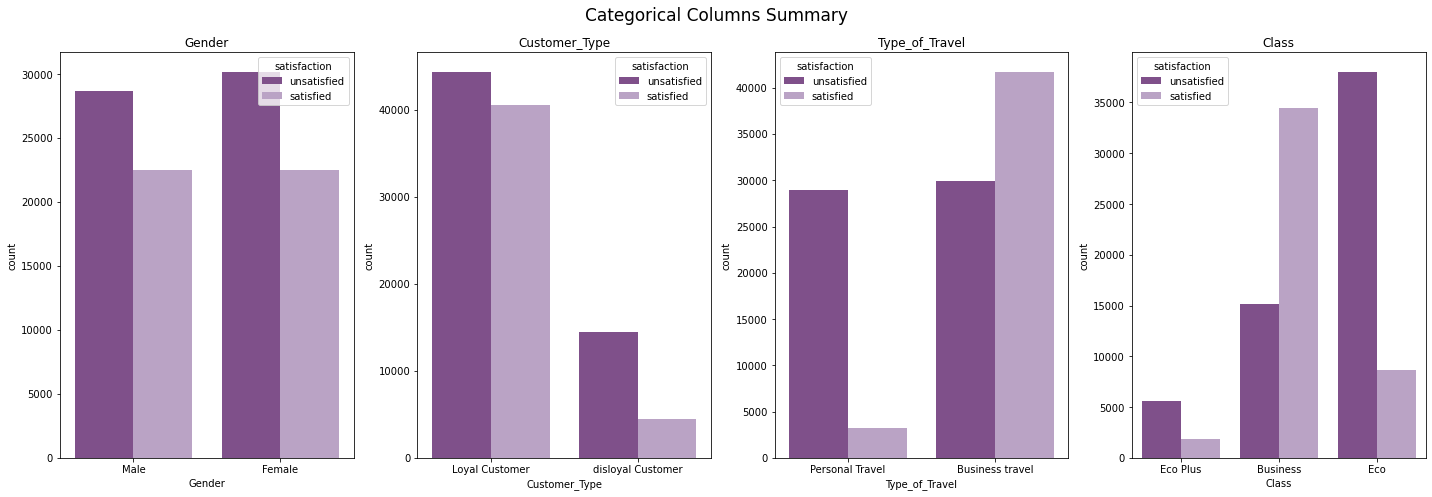

In [28]:
# Look at satisfaction by categorical data
ind = 0
fig,axes = plt.subplots(1,len(categorical),figsize=(20,7))
for ind,col in enumerate(categorical):
    sns.countplot(x=data[col], ax=axes[ind], hue = data['satisfaction'])
    axes[ind].set_title(col,size=12)
    
fig.suptitle("Categorical Columns Summary",size=17)
fig.tight_layout()
plt.show()

#### **Observations:**
Gender satisfaction/dissatisfaction is pretty even <br/>
Non repeating customers and personal travelers are dissatified while the business class is very satisfied

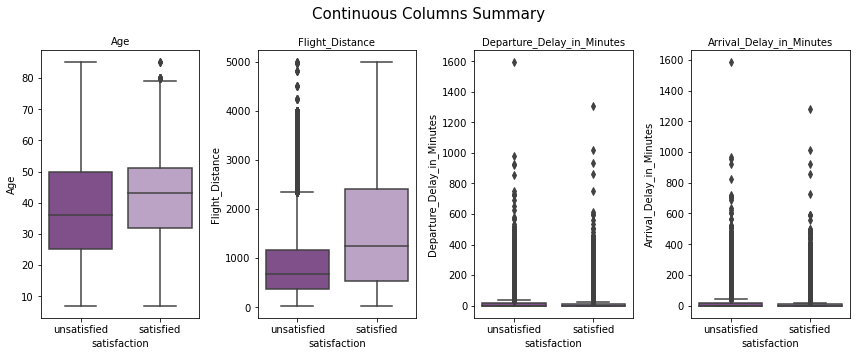

In [29]:
# Look at satisfaction by continuous variables
fig,axes = plt.subplots(1,len(continuous),figsize=(12,5))
for ind,col in enumerate(continuous):
    sns.boxplot(data=data,ax=axes[ind], x=data['satisfaction'], y=col)
    axes[ind].set_title(col,size=10)
    
fig.suptitle("Continuous Columns Summary",size=15)
fig.tight_layout()
plt.show()

#### **Observations:**
There are outliers in the Flight Distance, Departure_Delay_in_Minutes and Arrival_Delay_in_Minutes variables. <br/>

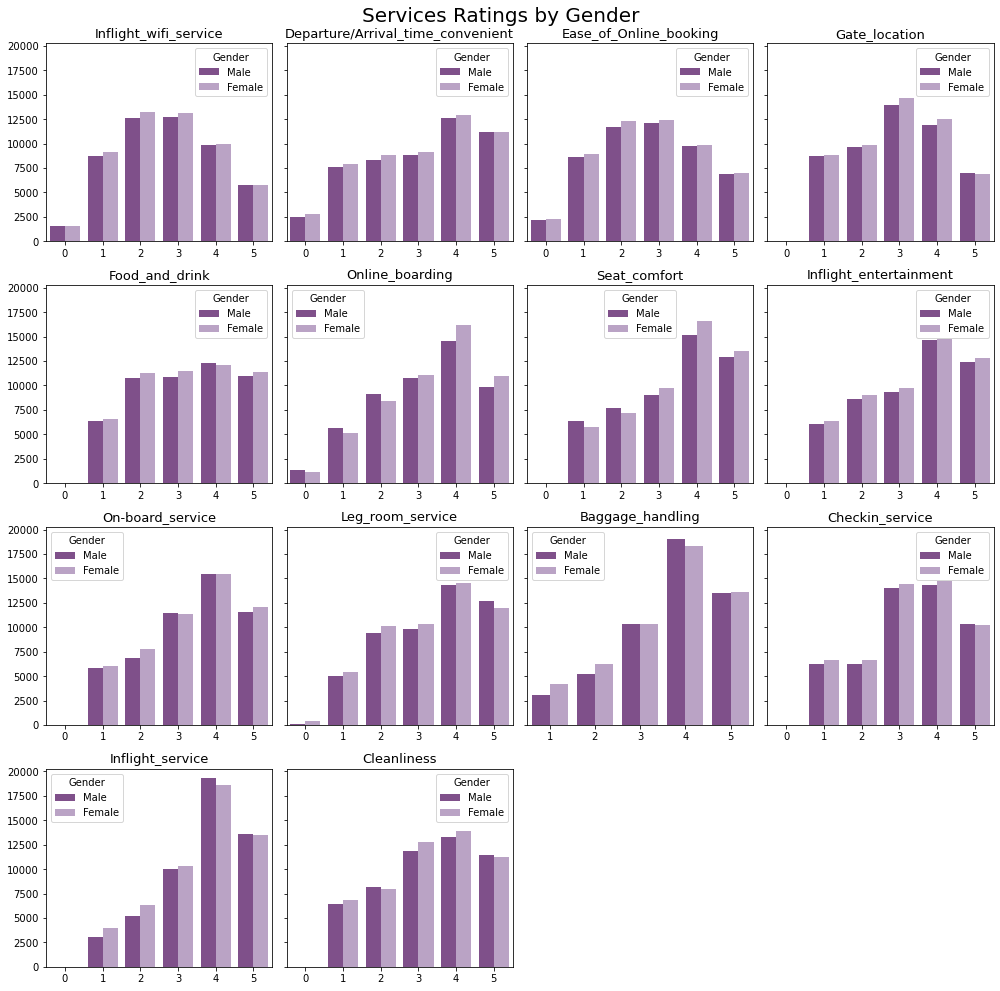

In [30]:
# Look at service ratings by gender
fig,axes = plt.subplots(4,4,figsize=(14,14),sharey=True)
k = 0
for i in range(4):
    for j in range(4):
        sns.countplot(data=data,x=services[k],ax=axes[i][j], hue='Gender')
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(services[k],size=13)

        k+=1
        if k>13:break
      
    
axes[3][2].axis('off')
axes[3][3].axis('off')

fig.suptitle("Services Ratings by Gender",size=20)
fig.tight_layout()
plt.show()


#### **Observations:**
Gender is pretty even across all service ratings <br/>

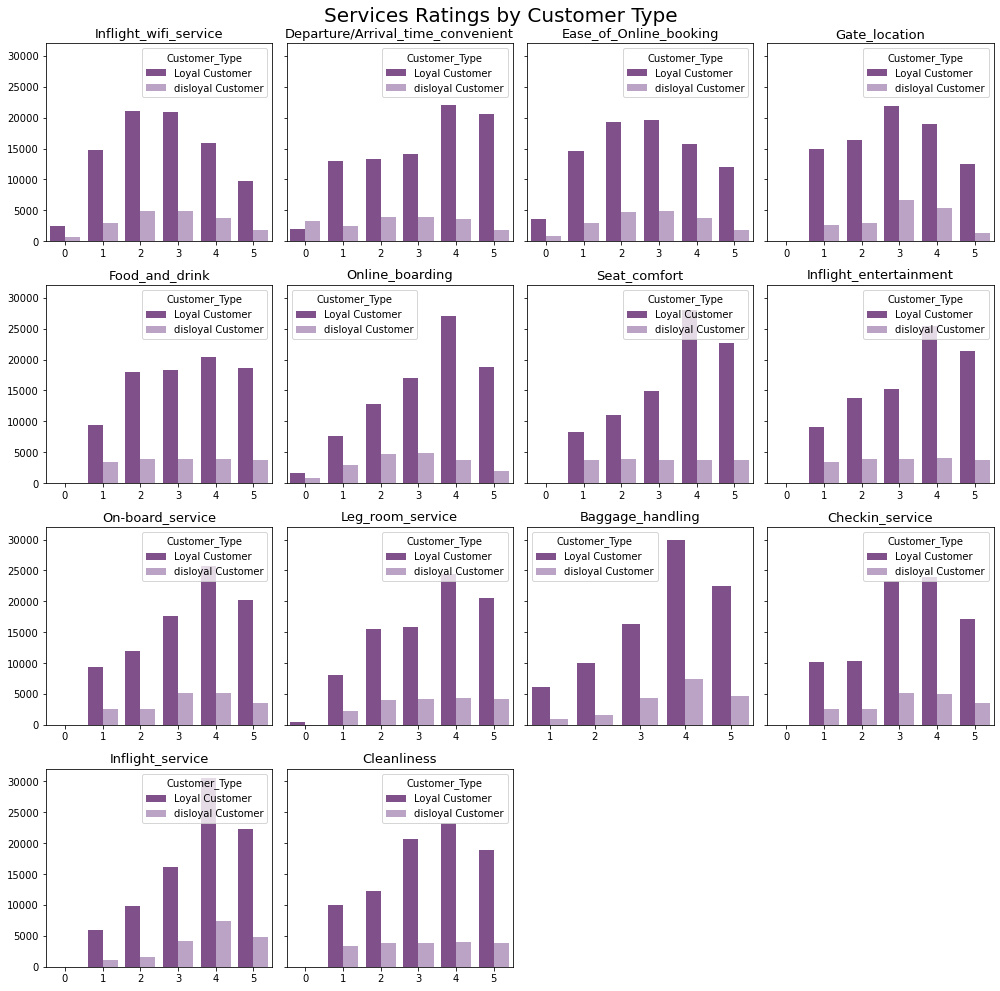

In [31]:
# Look at service ratings by customer type
fig,axes = plt.subplots(4,4,figsize=(14,14),sharey=True)
k = 0
for i in range(4):
    for j in range(4):
        sns.countplot(data=data,x=services[k],ax=axes[i][j], hue='Customer_Type')
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(services[k],size=13)

        k+=1
        if k>13:break
      
    
axes[3][2].axis('off')
axes[3][3].axis('off')

fig.suptitle("Services Ratings by Customer Type",size=20)
fig.tight_layout()
plt.show()


#### **Observations:**
Dissatisfaction outweighs satisfaction.  Recall this data is imbalanced. <br/>

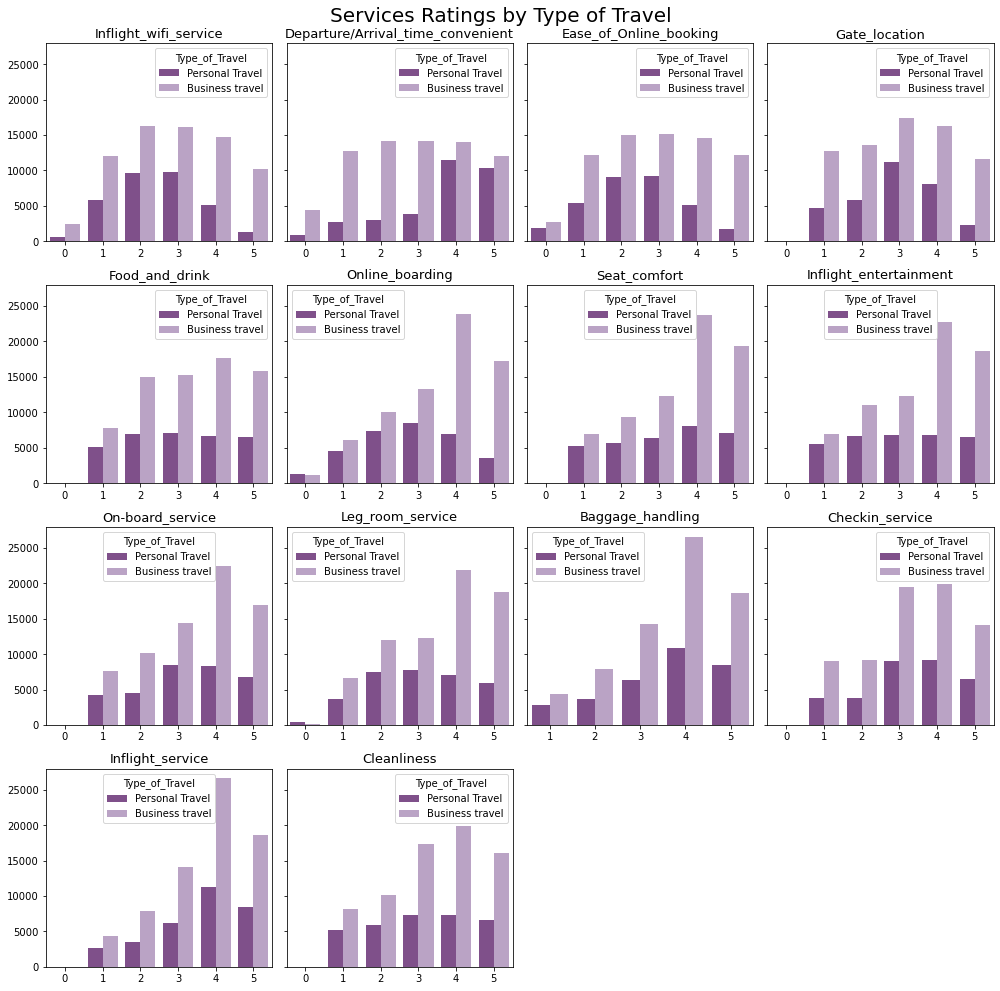

In [32]:
# Look at service ratings by type of travel
fig,axes = plt.subplots(4,4,figsize=(14,14),sharey=True)
k = 0
for i in range(4):
    for j in range(4):
        sns.countplot(data=data,x=services[k],ax=axes[i][j], hue='Type_of_Travel')
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(services[k],size=13)

        k+=1
        if k>13:break
      
    
axes[3][2].axis('off')
axes[3][3].axis('off')

fig.suptitle("Services Ratings by Type of Travel",size=20)
fig.tight_layout()
plt.show()


#### **Observations:**
The business traveler is satisfied with several services including online boarding, seat comfort, <br/>
baggage handling and inflight service. Again, this data is imbalanced.

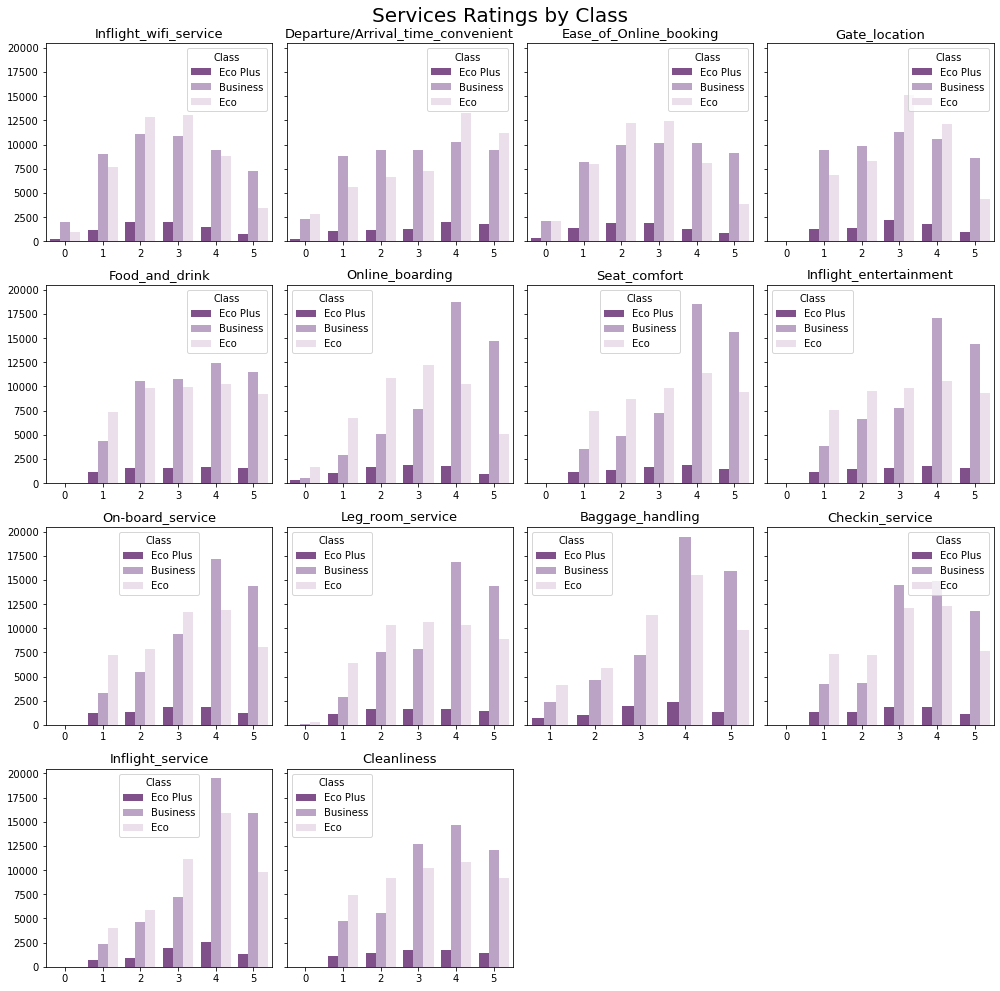

In [33]:
# Look at the service ratings by class
fig,axes = plt.subplots(4,4,figsize=(14,14),sharey=True)
k = 0
for i in range(4):
    for j in range(4):
        sns.countplot(data=data,x=services[k],ax=axes[i][j], hue='Class')
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(services[k],size=13)

        k+=1
        if k>13:break
      
    
axes[3][2].axis('off')
axes[3][3].axis('off')

fig.suptitle("Services Ratings by Class",size=20)
fig.tight_layout()
plt.show()


#### **Observations:**
Customers traveling business class are pretty satisifed. <br/>
Customers traveling economy class are satisfied with baggage handling and inflight service

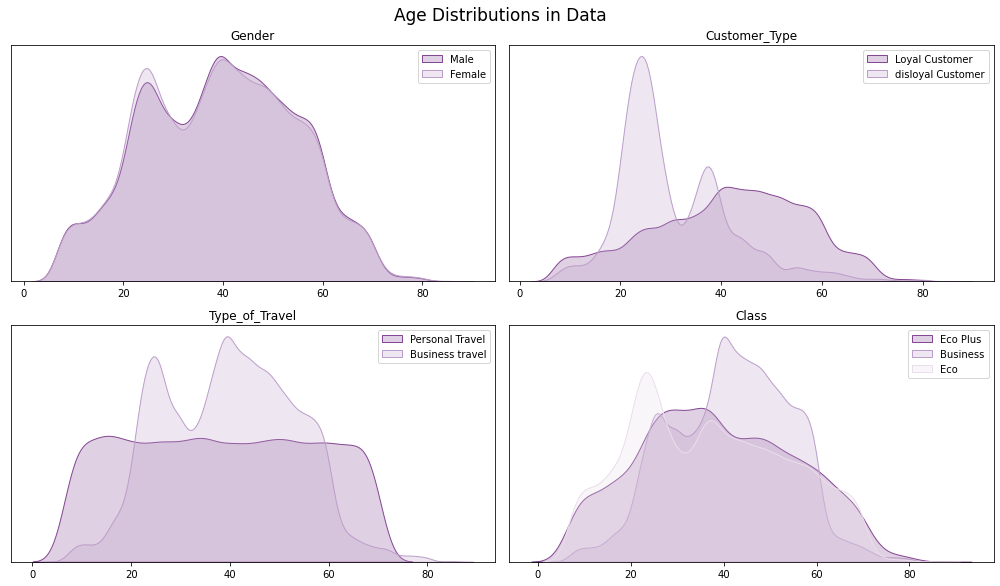

In [34]:
# Looking at categorical data by age
fig = plt.figure(figsize=(14,12))

for i,col in enumerate(categorical):
    plt.subplot(3,2,i+1)
    toplot = data[col].unique().tolist()
    for ind,j in enumerate(toplot):
        g = sns.kdeplot(data = data[data[col]==j],x='Age',label=j,fill=True)
    g.set_xlabel('')
    g.set_ylabel('')
    plt.yticks([])
    g.set_title(col)
    g.legend()

fig.suptitle("Age Distributions in Data",size=17)
fig.tight_layout()
plt.show()

#### **Observations:**
Age is equally distributed by gender.  Older customers are loyal customers and business travelers. <br/>
Younger customers are non reoccuring travelers and travel economy class

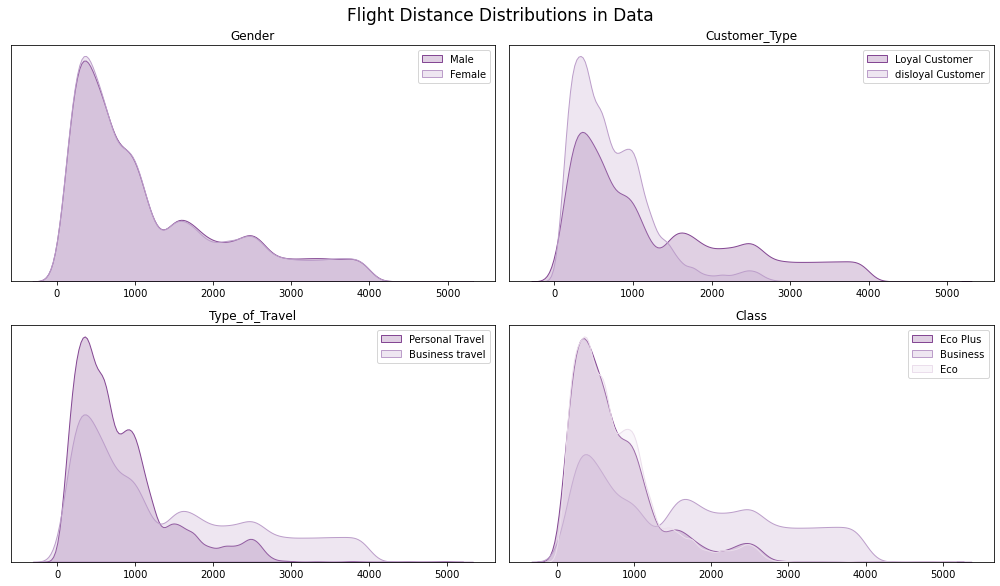

In [35]:
# Look at categorical data by Flight Distance
fig = plt.figure(figsize=(14,12))

for i,col in enumerate(categorical):
    plt.subplot(3,2,i+1)
    toplot = data[col].unique().tolist()
    for ind,j in enumerate(toplot):
        g = sns.kdeplot(data = data[data[col]==j],x='Flight_Distance',label=j,fill=True)
    g.set_xlabel('')
    g.set_ylabel('')
    plt.yticks([])
    g.set_title(col)
    g.legend()

fig.suptitle("Flight Distance Distributions in Data",size=17)
fig.tight_layout()
plt.show()

#### **Observations:**
Gender is pretty even in flight distance. The business traveler and returning customers travel longer distances <br/>

## Build an XGBoost Model

In [36]:
# Change values for the target variable
data.loc[data.satisfaction == "satisfied", 'satisfaction'] = 1
data.loc[data.satisfaction == "unsatisfied", 'satisfaction'] = 0
data['satisfaction'] = data['satisfaction'].astype('int64')

In [37]:
x = data.copy()
y = data['satisfaction']

In [38]:
del x['satisfaction']

In [39]:
# We saw earlier that the satisfaction factor was not imbalanced, so no need to use stratification when we split the data.
sum(y)/len(y)

0.43333269171542965

In [40]:
# Split the data with 70% training data and 30% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 12345)

In [41]:
# Percentage of train and test satisfaction factors are similar to the whole dataset
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.43191442556233844, 0.43664185807776207)

In [42]:
# Create dummy variables for the categorical variables
X_train = pd.get_dummies(x_train, columns = categorical, drop_first = True)

In [43]:
X_test = pd.get_dummies(x_test, columns = categorical, drop_first = True)

In [44]:
X_dummy = pd.get_dummies(x, columns = categorical, drop_first = True)

In [45]:
# Get a classifier instance. The objective 'binary:logistic' is the default objective.
xgb = XGBClassifier()

In [46]:
# Fit the data
fit = xgb.fit(X_train, y_train)

In [47]:
# Capture the score
xgb.score(X_train, y_train)

0.9789226200296981

In [48]:
# Generate predictions on the test data
y_pred = xgb.predict(X_test)

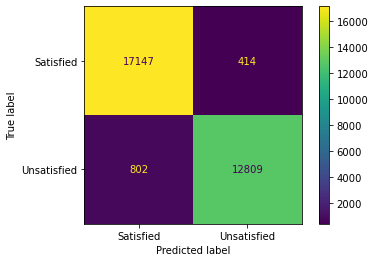

In [49]:
# Examine the confustion matrix
plot_confusion_matrix(xgb, X_test, y_test, values_format='d', display_labels=["Satisfied", "Unsatisfied"])

#### **Observation:**
Of the 17,561 people that are satisfied, 17147 (97.6%) were correctly classified.  Of the 13,611 people who are not satisfied, 12809 ( 94.1%) were correctly classified.

In [50]:
# Look at the AUC
y_pred_prob = xgb.predict_proba(X_test)[:, 1]

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = sklearn.metrics.auc(fpr, tpr)
auc

0.9946116242623595

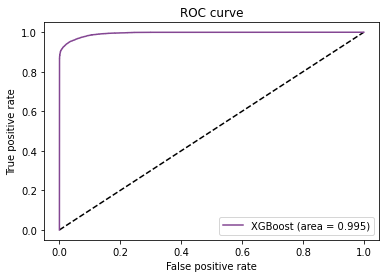

In [52]:
# Plot the AUC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='XGBoost (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [53]:
# Build a model using tuned parameters
xgb_t = XGBClassifier(n_estimators=75, max_depth=9, learning_rate = 0.2, subsample=1, random_state = 12345)

In [54]:
# Fit the data
fit_t = xgb_t.fit(X_train, y_train)

In [55]:
# Capture the scofre
xgb_t.score(X_train, y_train)

0.9869245999010064

In [56]:
# Generate predictions on the test data
y_pred_t = xgb_t.predict(X_test)

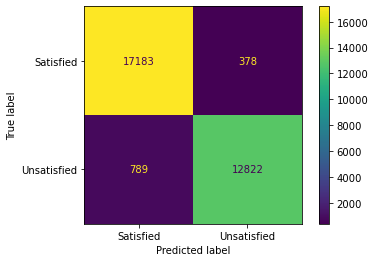

In [57]:
# Examine the confustion matrix
plot_confusion_matrix(xgb_t, X_test, y_test, values_format='d', display_labels=["Satisfied", "Unsatisfied"])

#### **Observation:**
Of the 17,561 people that are satisfied, 17183 (97.8%) were correctly classified.  Of the 13,611 people who are not satisfied, 12822 ( 94.2%) were correctly classified. These results were only slightly better than the results from the untuned model.

In [58]:
# Look at the AUC
y_pred_prob_t = xgb_t.predict_proba(X_test)[:, 1]

In [59]:
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, y_pred_prob_t)
auc_t = sklearn.metrics.auc(fpr_t, tpr_t)
auc_t

0.9949645383368096

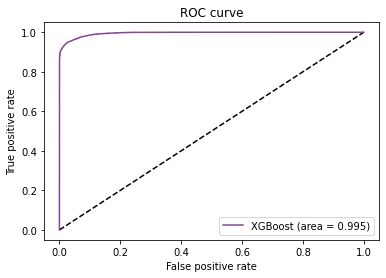

In [60]:
# Plot the AUC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_t, tpr_t, label='XGBoost (area = {:.3f})'.format(auc_t))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

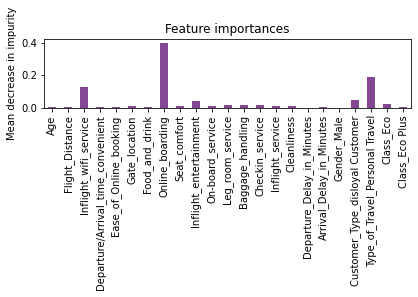

In [61]:
# Determine which variables are important
importances = pd.Series(xgb_t.feature_importances_, index = xgb_t.feature_names_in_)

fig, ax = plt.subplots()
importances.plot.bar(ax = ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

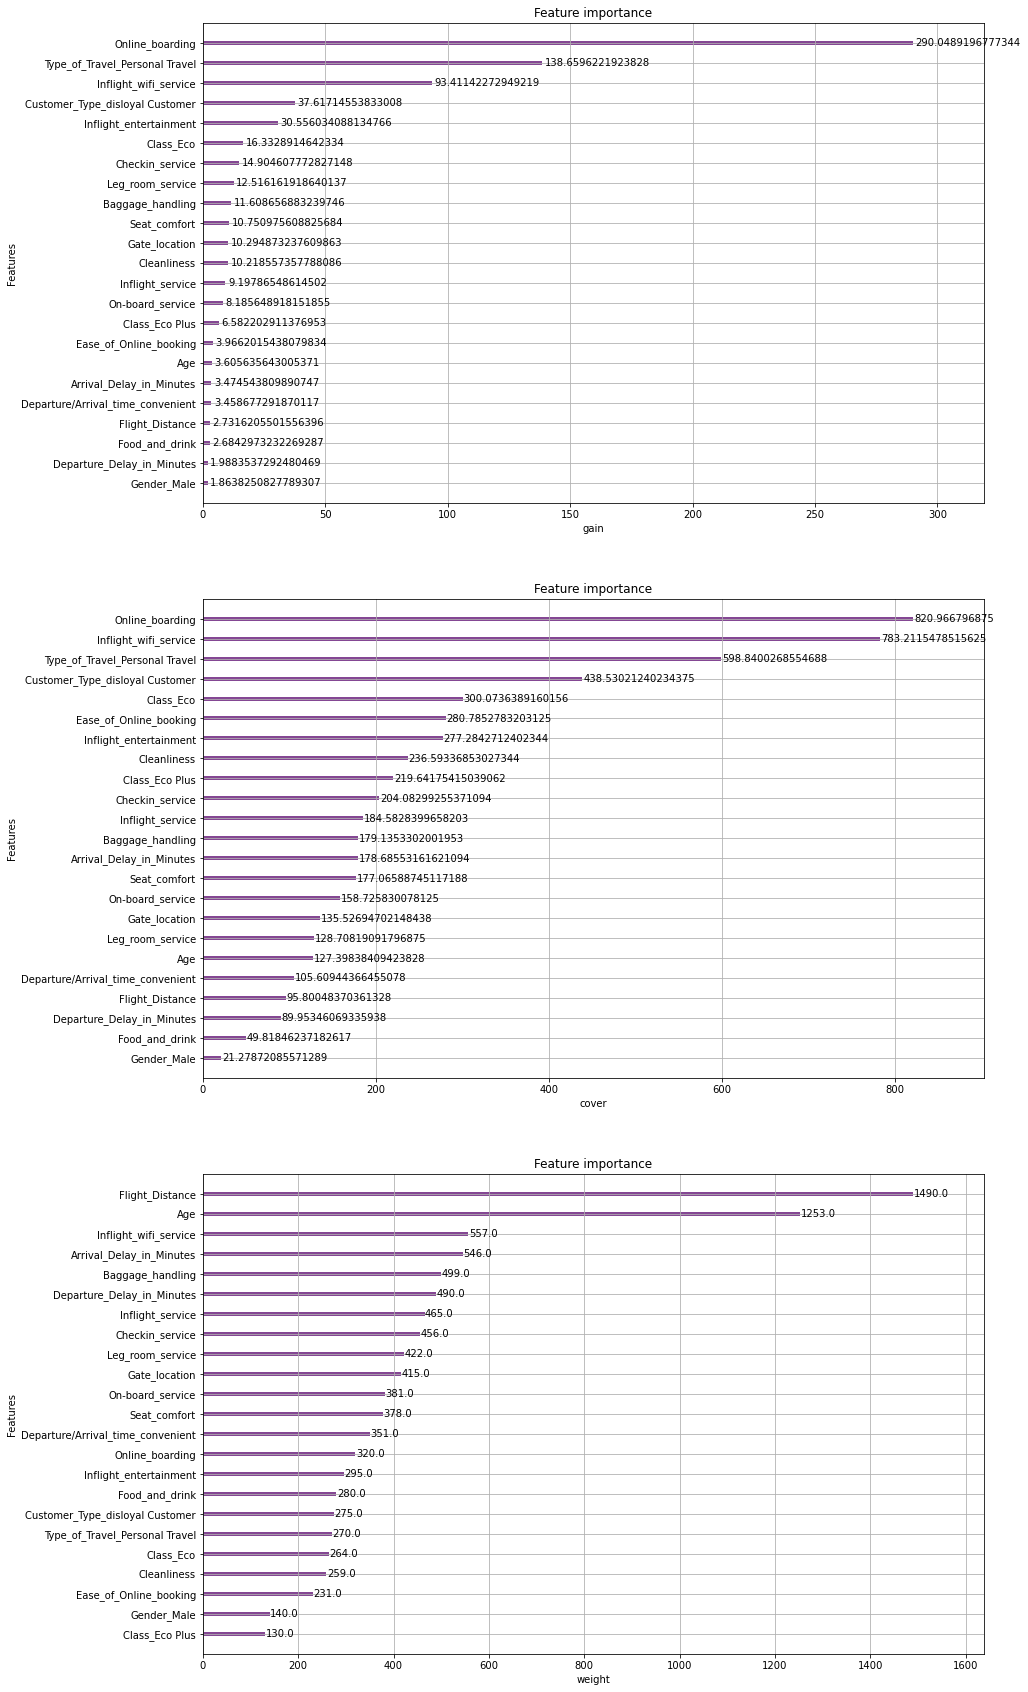

In [62]:
# Look at the variable by attributes
fig, ax = plt.subplots(3,1,figsize=(14,30))
features = 23
importance_types = ['gain', 'cover', 'weight']

for i, imp in enumerate(importance_types):
    plot_importance(xgb_t, ax=ax[i], max_num_features = features,
                   importance_type = imp,
                   xlabel = imp)

## Recommendations to improve customer satisfaction:
<li>Enhance online boarding</li>
<li>Improve the personal traveler's experience</li>
<li>Offer and/or enhance in-flight wifi service</li>